In [4]:
import numpy as np
import pandas as pd

# Load dataset with tolerant parser
df = pd.read_csv("data.csv", encoding="latin1", engine="python", on_bad_lines="skip")

# NO2 feature
x = df["no2"].dropna().values

# Roll-number parameters
ar = 0.05 * (102317062 % 7)   # = 0
br = 0.3 * (102317062 % 5 + 1)

# Transformation: z = x + ar*sin(br*x)
z = x + ar * np.sin(br * x)

# MLE parameter estimation
mu = np.mean(z)
var = np.var(z, ddof=0)
lambda_ = 1 / (2 * var)
c = np.sqrt(lambda_ / np.pi)

print("FINAL PARAMETERS")
print(f"μ= {mu:.6f}")
print(f"λ= {lambda_:.6f}")
print(f"c= {c:.6f}")


FINAL PARAMETERS
μ= 25.808240
λ= 0.001460
c= 0.021559


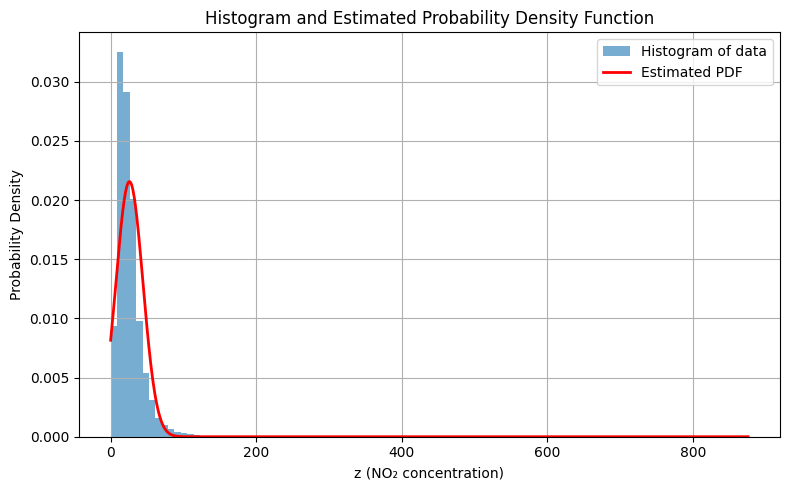

In [5]:
import matplotlib.pyplot as plt
z_range = np.linspace(z.min(), z.max(), 1000)
pdf = c * np.exp(-lambda_ * (z_range - mu) ** 2)

plt.figure(figsize=(8, 5))
plt.hist(z, bins=100, density=True, alpha=0.6, label="Histogram of data")
plt.plot(z_range, pdf, 'r', linewidth=2, label="Estimated PDF")
plt.xlabel("z (NO₂ concentration)")
plt.ylabel("Probability Density")
plt.title("Histogram and Estimated Probability Density Function")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()